# Part II - Insights From Trip Duration and Insights From Ford GoBike System Data
## Cyril Selase Akafia

## Investigation Overview

In this investigation, I wanted to look at the characteristics of users who ride the bike-sharing system. The main focus was on their trip duration and distance. I also investigated the relationship between trip duration and distance with other features. 


## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data is available for public use under the following license: https://www.lyft.com/bikes/bay-wheels/system-data.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe

df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [4]:
# make a copy of the data for plotting
df_plot = df.copy()

# adding a new column for the duration in minutes

df_plot['duration_min'] = df_plot['duration_sec']/60

# adding a new column for the distance travelled in km

# define a function to calculate the distance between two points on a map

# import the necessary libraries

from math import sin, cos, sqrt, atan2, radians

def distance(lat1, lon1, lat2, lon2):
    """
    This function calculates the distance between two points on a map.
    """
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

# calculate the distance between start and end stations

df_plot['distance'] = df_plot.apply(lambda x: distance(x['start_station_latitude'], x['start_station_longitude'], x['end_station_latitude'], x['end_station_longitude']), axis=1)

## Distribution of Trip Duration

The distribution of trip duration was skewed to the right. The average trip duration was 12 minutes with majority of the bike rides being below 100 minutes.

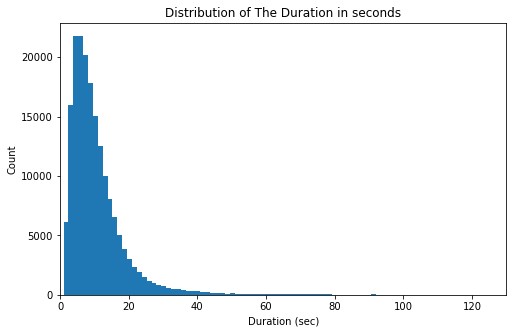

In [22]:
# visualizing the distribution of the duration in minutes

plt.figure(figsize=[8, 5])
plt.hist(data = df_plot, x = 'duration_min', bins = 1000)
plt.xlim(0, 130)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of The Duration in seconds');

## Distribution of Trip Distance

The distribution of trip distance was similart to the distribution of trip duration. The average trip distance was 1.5 km with majority of the bike rides being below 10 km. There were some users who did not travel at all. This was due to the fact that the start and end station were the same.


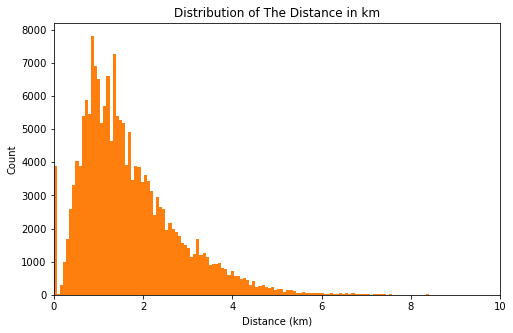

In [21]:
# visualizing the distribution of the distance in minutes

plt.figure(figsize=[8, 5])
plt.hist(data = df_plot, x = 'distance', bins = 1000, color = sb.color_palette()[1])
plt.xlim(0, 10)
plt.xlabel('Distance (km)')
plt.ylabel('Count')
plt.title('Distribution of The Distance in km');

## Average Trip Duration by User Type

The average trip duration was about 12 minutes. Customers usually had longer trip duration than subscribers. The average trip duration for customers was about 20 minutes while that of subscribers was about 10 minutes. This may be due to the fact that subscribers use the bike-sharing system for commuting to work or school while customers use it for leisure.

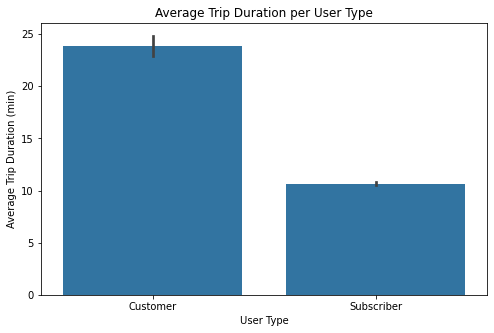

In [19]:
# plot the average trip duration per user type

plt.figure(figsize=[8, 5])

# define base color
base_color = sb.color_palette()[0]

sb.barplot(data = df_plot, x = 'user_type', y = 'duration_min', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration (min)')
plt.title('Average Trip Duration per User Type');

## Average Trip Distance by User Type

The average trip distance was about 1.5 km. Customers usually had longer trip distance than subscribers. The average trip distance for customers was about 2.5 km while that of subscribers was about 1.5 km. This may be due to the fact that subscribers use the bike-sharing system for commuting to work or school while customers use it for leisure. This is similar to the average trip duration by user type.

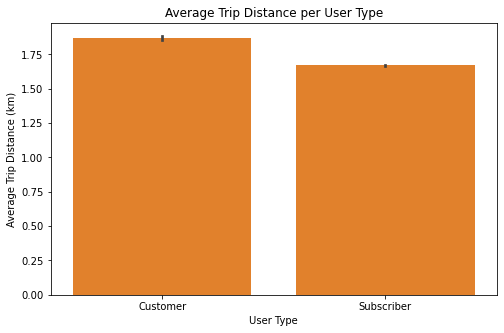

In [23]:
# plot the average trip distance per user type

plt.figure(figsize=[8, 5])

# define base color
base_color = sb.color_palette()[1]

sb.barplot(data = df_plot, x = 'user_type', y = 'distance', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Average Trip Distance (km)')
plt.title('Average Trip Distance per User Type');

## Average Trip Duration by Member Gender

Other gender types had the longest average trip duration however for the two main genders, females had the longest trip duration.

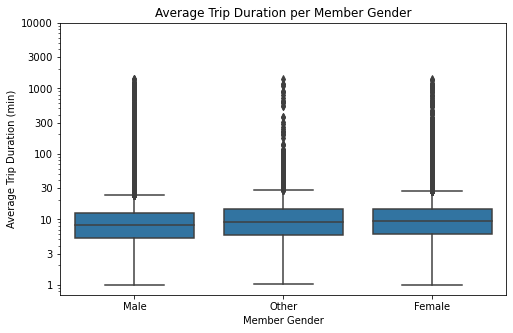

In [32]:
# plot the average trip duration per member gender

plt.figure(figsize=[8, 5])

# define base color
base_color = sb.color_palette()[0]

sb.boxplot(data = df_plot, x = 'member_gender', y = 'duration_min', color = base_color)
plt.yscale('log')
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
plt.yticks(ticks, ticks)
plt.xlabel('Member Gender')
plt.ylabel('Average Trip Duration (min)')
plt.title('Average Trip Duration per Member Gender');

## Average Trip Distance by Member Gender

For the two main genders, Female had the longest trip distance while male had the shortest trip distance. However the difference between the two was not significant.

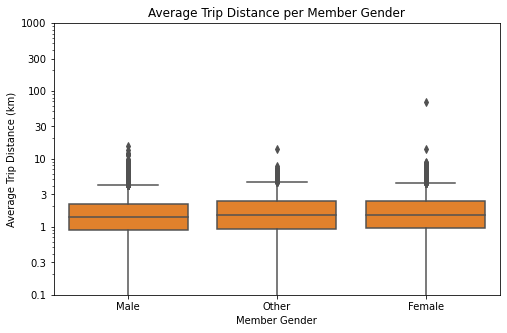

In [33]:
# plot the average trip duration per member gender

plt.figure(figsize=[8, 5])

# define base color
base_color = sb.color_palette()[1]

sb.boxplot(data = df_plot, x = 'member_gender', y = 'distance', color = base_color)
plt.yscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.yticks(ticks, ticks)
plt.xlabel('Member Gender')
plt.ylabel('Average Trip Distance (km)')
plt.title('Average Trip Distance per Member Gender');

## Average Trip Duration for Each User Type by Member Gender

For both user types i.e., customers and subscribers, the 'other' gender type took longer trips. However considering the majority genders, females took longer rides.


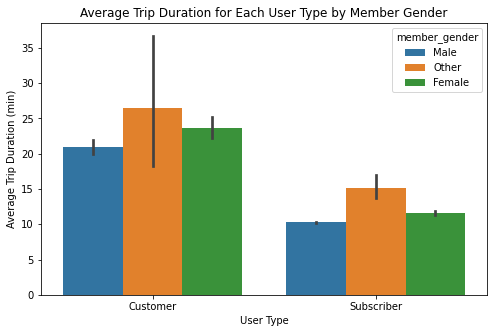

In [27]:
# plot the average trip duration per user type and gender

plt.figure(figsize=[8, 5])
sb.barplot(data=df_plot, x='user_type', y='duration_min', hue='member_gender');
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration (min)')
plt.title('Average Trip Duration for Each User Type by Member Gender');